In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

In [4]:
# printing first five rows
train.head()
test.head()
# columns in the dataset
train.columns
test.columns
# Data type of the columns
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
corr

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.991839,0.459414,0.344451,-0.048478,-0.008669,0.415938
atemp,0.991839,1.000000,0.454015,0.342345,-0.031606,-0.049997,0.412644
casual,0.459414,0.454015,1.000000,0.509175,-0.320253,0.079524,0.707938
registered,0.344451,0.342345,0.509175,1.000000,-0.279501,0.100579,0.968329
humidity,-0.048478,-0.031606,-0.320253,-0.279501,1.000000,-0.296975,-0.322269
windspeed,-0.008669,-0.049997,0.079524,0.100579,-0.296975,1.000000,0.105607
count,0.415938,0.412644,0.707938,0.968329,-0.322269,0.105607,1.000000


In [6]:
mask = np.array(corr)
mask

array([[ 1.        ,  0.99183916,  0.4594135 ,  0.34445105, -0.04847786,
        -0.00866888,  0.41593836],
       [ 0.99183916,  1.        ,  0.45401532,  0.34234531, -0.03160613,
        -0.04999706,  0.41264434],
       [ 0.4594135 ,  0.45401532,  1.        ,  0.50917543, -0.32025345,
         0.07952397,  0.70793834],
       [ 0.34445105,  0.34234531,  0.50917543,  1.        , -0.27950085,
         0.1005788 ,  0.96832875],
       [-0.04847786, -0.03160613, -0.32025345, -0.27950085,  1.        ,
        -0.2969754 , -0.32226874],
       [-0.00866888, -0.04999706,  0.07952397,  0.1005788 , -0.2969754 ,
         1.        ,  0.10560659],
       [ 0.41593836,  0.41264434,  0.70793834,  0.96832875, -0.32226874,
         0.10560659,  1.        ]])

In [20]:
mask[np.tril_indices_from(mask)] = False


In [15]:
mask[np.tril_indices_from(mask)]

array([ 1.        ,  0.99183916,  1.        ,  0.4594135 ,  0.45401532,
        1.        ,  0.34445105,  0.34234531,  0.50917543,  1.        ,
       -0.04847786, -0.03160613, -0.32025345, -0.27950085,  1.        ,
       -0.00866888, -0.04999706,  0.07952397,  0.1005788 , -0.2969754 ,
        1.        ,  0.41593836,  0.41264434,  0.70793834,  0.96832875,
       -0.32226874,  0.10560659,  1.        ])

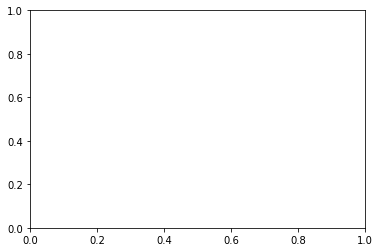

In [21]:
fig,ax= plt.subplots()

In [22]:
fig.set_size_inches(20,10)

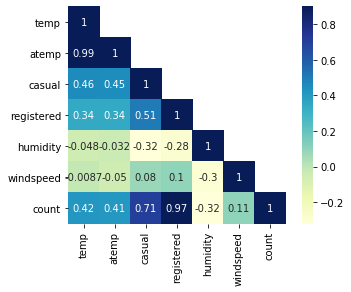

In [23]:
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")